## Stratification groups via data migration

In [1]:
using Catlab, Catlab.CategoricalAlgebra, Catlab.Programs
using AlgebraicPetri

Use an acset with a nearly trivial schema (for "labeled sets") to record the groups.

In [2]:
@present SchLabeledSet(FreeSchema) begin
  S::Ob
  Label::AttrType
  label::Attr(S, Label)
end

@acset_type LabeledSet(SchLabeledSet)

LabeledSet

In [3]:
groups = @acset LabeledSet{Symbol} begin
  S = 3
  label = [:Child, :Teen, :Adult]
end

S,label
1,Child
2,Teen
3,Adult


Migrate data from labeled sets to labeled Petri nets. By contravariance, this requires a schema migration from the schema for labeled Petri nets to the schema for labeled sets.

This data migration uses **duc queries**: disjoint unions of conjunctive queries. In this case, they are actually disjount unions of products (aka cross joins).

In [4]:
group_migration = @migration SchLabelledPetriNet SchLabeledSet begin
  S => S
  T => @product (s1::S; s2::S)
  (I, O) => @cases begin
    arc1 => @product (s1::S; s2::S)
    arc2 => @product (s1::S; s2::S)
  end
  (is, os) => begin
    arc1 => s1
    arc2 => s2
  end
  (it, ot) => begin
    arc1 => (s1 => s1; s2 => s2)
    arc2 => (s1 => s1; s2 => s2)
  end
  
  Name => Label
  sname => label
  tname => s1 ⋅ label # XXX: Should use both labels.
end;

In [5]:
net = migrate(LabelledPetriNet, groups, group_migration)

show(IOContext(stdout, :compact=>true), net)

LabelledPetriNet {T = 9, S = 3, I = 18, O = 18}

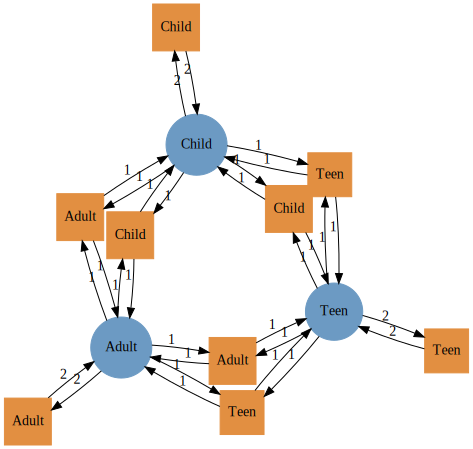

In [6]:
using Catlab.Graphics: Graphviz

Graphviz.Graph(net, prog="neato", edge_attrs=Dict(:len => "1.5"))